In [0]:
import cvxpy as cvx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import seaborn as sns
import statistics

# Data

In [0]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1oHeX_64e8pxoDj1UEIwykzRImTnX_dg9")
df

,name,return,risk,actual
0,Milestone Pharmaceuticals,0.044465,0.159875,0.026667
1,NextCure,0.051831,0.099106,0.326667
2,South Plains Financial,0.191187,0.258347,0.011429
3,Satsuma Pharmaceuticals,0.072822,0.106503,0.126667
4,Cloudflare,0.036027,0.202901,0.000000
5,SpringWorks Therapeutics,0.321089,0.214062,0.255556
6,IGM Biosciences,0.232674,0.213043,0.518750
7,Datadog,0.230855,0.268920,0.392593
8,Exagen,0.049967,0.179076,0.221429
9,Oportun Financial,0.076586,0.176406,0.080000


In [0]:
df_full = pd.read_csv("https://drive.google.com/uc?export=download&id=1BzAg8QC7ds_UgrhsM8pdbwGAuDOcfzuE")
df_full.head()

,Company,Industry,Employee_size,Age,IsUs,Revenues_millions,Net_Income_millions,Is_top8_IB,Exchange,Month,Offer_Date,Shares_millions,Est_volume_millions,Offer_Price,First_Day_Close
0,Spring Bank Pharmaceuticals,Healthcare,17,17,1,0.9,-11.6,0,NASDAQ,6,6/5/2016,0.9,11.0,12.0,11.1
1,ObsEva SA,Healthcare,27,7,0,0.0,-25.6,1,NASDAQ,1,1/26/2017,6.5,96.8,15.0,11.7
2,Snap,Technology,1859,9,1,404.5,-514.6,1,NYSE,2,2/3/2017,200.0,3400.0,17.0,27.1
3,Spero Therapeutics,Healthcare,26,6,1,0.0,-35.0,1,NASDAQ,2,2/11/2017,5.5,77.0,14.0,11.6
4,Tocagen,Healthcare,61,12,1,0.0,-33.4,0,NASDAQ,4,4/13/2017,8.5,85.0,10.0,12.5


In [0]:
df_full['return']=(df_full['First_Day_Close']-df_full['Offer_Price'])/df_full['Offer_Price']
print(df_full['return'])

0     -0.075000
1     -0.220000
2      0.594118
3     -0.171429
4      0.250000
         ...   
362    0.000000
363    0.353846
364   -0.186957
365    0.353846
366   -0.273913
Name: return, Length: 367, dtype: float64


In [0]:
# ListCompany=[]
# ListComp=[]
# returnValue = df_full['return']
# for name1 in df['name']:
#   for nameindex, name2 in enumerate(df_full['Company']):
#     if (name1 == name2):
#       ListCompany.append(returnValue[nameindex])
# print(ListCompany)
# for i in range(62):
#   if (i%2==1):
#     ListComp.append(ListCompany[i])
# print(ListComp)

In [0]:
df.shape

(31, 4)

In [0]:
returnCoef =  df['return'] #rate of return coefficient for our objective function
actualReturn = df['actual']
riskCoef = df['risk'] #risk coefficient for each variable
print("return is:", returnCoef,"actual return is", actualReturn," risk is: ",riskCoef)

return is: 0     0.044465
1     0.051831
2     0.191187
3     0.072822
4     0.036027
5     0.321089
6     0.232674
7     0.230855
8     0.049967
9     0.076586
10    0.172522
11    0.136712
12    0.162258
13    0.282508
14    0.064641
15    0.397017
16    0.154905
17    0.085152
18    1.014454
19    0.086031
20    0.546064
21    0.382969
22    0.225159
23    0.071443
24    0.064043
25    0.314980
26    0.262709
27    0.166206
28    0.330605
29    0.357599
30    0.354822
Name: return, dtype: float64 actual return is 0     0.026667
1     0.326667
2     0.011429
3     0.126667
4     0.000000
5     0.255556
6     0.518750
7     0.392593
8     0.221429
9     0.080000
10   -0.110345
11    0.000000
12   -0.090909
13    0.294737
14    0.223077
15   -0.264706
16    0.175000
17    0.178571
18    0.109091
19    0.171429
20    0.595833
21    0.364286
22    0.035294
23   -0.107143
24    0.010000
25   -0.300000
26   -0.031250
27    0.300000
28    0.342105
29    0.353846
30   -0.186957
Name: actual,

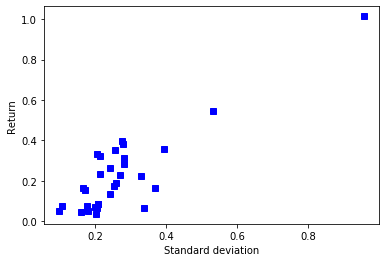

In [0]:
for num in range(31):
    plt.plot(df['risk'][num], df['return'][num], 'bs')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

In [0]:
# # Plot long only trade-off curve.
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

# markers_on = [13, 27] ## why chose [29,40] ?
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.plot(df['risk'], df['return'], 'g-')
# for num in markers_on:
#     plt.plot(df['risk'][num], df['return'][num], 'bs')
#     ax.annotate(i, xy=(df['risk'][num]+.08, df['return'][num]-.03))
# for i in range(31):
#     plt.plot(df['risk'][i], df['return'][i], 'ro')
# plt.xlabel('Standard deviation')
# plt.ylabel('Return')
# plt.show()

# Optimization: Risk-averse

**Run 100 replication, Get Average and CI**

In [0]:
listpredict = []
listactual = []
listdiff = []
listdiff2 = []
listrandom = []

for i in range(100):
  listreturn=[]
  listrisk=[]
  listactualreturn=[]
  v = np.random.randint(0,30,10)
  #get random combination of 10 companies
  for num in v:
    listreturn.append(returnCoef[num])
    listrisk.append(riskCoef[num])
    listactualreturn.append(actualReturn[num])
  #print(listactualreturn)
  #LP
  n=10 #number of companies
  x = cvx.Variable(n, nonneg=True) #create a variable for weight, total n
  y = cvx.Variable(n, boolean=True)
  obj = cvx.Maximize(x*listreturn)
  cons = [] #initialize constraint list
  cons.append(cvx.sum(x) == 1) #weight sum to 1
  cons.append(x*listrisk <= 0.25) #risk constraints
  #cons.append(cvx.sum(y) >= 5)
  #cons.append(x >= y*0.05)
  cons.append(x <= y*0.2)
  prob = cvx.Problem(obj,cons)
  prob.solve()

  #get output
  predictWeight = x.value
  predictreturn = prob.value
  #np.sum(predictWeight*listreturn)
  actualreturn = np.sum(predictWeight*listactualreturn)
  listpredict.append(predictreturn)
  listactual.append(actualreturn)
  listdiff.append(predictreturn-actualreturn)
  
  # summation = 0  #variable to store the summation of differences
  # for i in range (0,n):  #looping through each element of the list
  #   difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
  #   squared_difference = difference**2  #taking square of the differene 
  #   summation = summation + squared_difference  #taking a sum of all the differences
  # MSE = summation/n  #dividing summation by total values to obtain average
  # print "The Mean Square Error is: " , MSE
  
  #random weight generation
  a = np.random.random(10)
  a /= a.sum()
  randomreturn = np.sum(a*listactualreturn)
  #randomreturn = np.sum(a*listreturn)
  listrandom.append(randomreturn)
  listdiff2.append(actualreturn-randomreturn)
#print("the 100 predicted returns are: ", listpredict)
#print("the 100 (predict return-actual return) is: ",listdiff)

predictAvg = statistics.mean(listpredict)
predictstd = statistics.stdev(listpredict)
print("the average predict return is: ", statistics.mean(listpredict))
print("the predict return CI is: ", predictAvg-1.96*predictstd/10, predictAvg+1.96*predictstd/10)
actualAvg =  statistics.mean(listactual)
actualstd = statistics.stdev(listactual)
print("the average actual return is: ", statistics.mean(listactual))
print("the actual return CI is: ", actualAvg-1.96*actualstd/10, actualAvg+1.96*actualstd/10)
randomAvg = statistics.mean(listrandom)
randomstd = statistics.stdev(listrandom)
print("the average random return is: ", statistics.mean(listrandom))
print("the random return CI is: ", randomAvg-1.96*randomstd/10, randomAvg+1.96*randomstd/10)

# mean = statistics.mean(listdiff)
# print("the average (predict return-actual return) is: ", mean)
# print("the average (actual return-random return) is: ", statistics.mean(listdiff2))
# std = statistics.stdev(listdiff)
# print("the difference CI is: ", mean-1.96*std/10, mean+1.96*std/10)

the average predict return is:  0.2616638155531881
the predict return CI is:  0.253909592916216 0.26941803819016014
the average actual return is:  0.18456210107852813
the actual return CI is:  0.16246146283386179 0.20666273932319448
the average random return is:  0.14958314827017763
the random return CI is:  0.1352831915301682 0.16388310501018705


In [0]:
# summation = 0  #variable to store the summation of differences
# for i in range (0,len(listdiff)):  #looping through each element of the list
#   difference = listdiff[i] - [i]  #finding the difference between observed and predicted value
#   squared_difference = difference**2  #taking square of the differene 
#   summation = summation + squared_difference  #taking a sum of all the differences
# MSE = summation/n  #dividing summation by total values to obtain average
# print "The Mean Square Error is: " , MSE

In [0]:
# listpredict = []
# listactual = []
# listdiff = []
# listrandom = []

# for i in range(100):
#   listreturn=[]
#   listrisk=[]
#   listactualreturn=[]
#   v = np.random.randint(0,30,20)
#   #get random combination of 10 companies
#   for num in v:
#     listreturn.append(returnCoef[num])
#     listrisk.append(riskCoef[num])
#     listactualreturn.append(actualReturn[num])
#   #print(listactualreturn)
#   #LP
#   n=20 #number of companies
#   x = cvx.Variable(n, nonneg=True) #create a variable for weight, total n
#   y = cvx.Variable(n, boolean=True)
#   obj = cvx.Maximize(x*listreturn)
#   cons = [] #initialize constraint list
#   cons.append(cvx.sum(x) == 1) #weight sum to 1
#   cons.append(x*listrisk <= 0.25) #risk constraints
#   cons.append(cvx.sum(y) >= 5)
#   cons.append(x >= y*0.1)
#   prob = cvx.Problem(obj,cons)
#   prob.solve()

#   #get output
#   predictWeight = x.value
#   predictreturn = prob.value
#   #np.sum(predictWeight*listreturn)
#   actualreturn = np.sum(predictWeight*listactualreturn)
#   listpredict.append(predictreturn)
#   listactual.append(actualreturn)
#   listdiff.append(predictreturn-actualreturn)

#   #random weight generation
#   a = np.random.random(20)
#   a /= a.sum()
#   randomreturn = np.sum(a*listactualreturn)
#   randomreturn = np.sum(a*listreturn)
#   listrandom.append(randomreturn)

# #print("the 100 predicted returns are: ", listpredict)
# #print("the 100 (predict return-actual return) is: ",listdiff)

# predictAvg = statistics.mean(listpredict)
# print("the average predict return is: ", statistics.mean(listpredict))
# actualAvg =  statistics.mean(listactual)
# print("the average actual return is: ", statistics.mean(listactual))
# randomAvg = statistics.mean(listrandom)
# print("the average random return is: ", statistics.mean(listrandom))

# mean = statistics.mean(listdiff)
# print("the average (predict return-actual return) is: ", mean)
# std = statistics.stdev(listdiff)
# print("the difference CI is: ", mean-1.96*std/10, mean+1.96*std/10)

the average predict return is:  0.33769265002606746
the average actual return is:  0.11303600408470356
the average random return is:  0.22496696609938033
the average (predict return-actual return) is:  0.2246566459413639
the difference CI is:  0.19224510205976575 0.25706818982296203


In [0]:
n=31 #number of companies
x = cvx.Variable(n, nonneg=True) #create a variable for weight, total n
y = cvx.Variable(n, boolean=True)
obj = cvx.Maximize(x*returnCoef)
cons = [] #initialize constraint list
cons.append(cvx.sum(x) == 1) #weight sum to 1
cons.append(x*riskCoef <= 0.25) #risk constraints
cons.append(cvx.sum(y) >= 5)
cons.append(x >= y*0.05)
prob = cvx.Problem(obj,cons)
prob.solve()
print("The weight for investment on companies: ",x.value)
#print("y: ",y.value)
print("Final predicted return percentage: ",prob.value)
# listx=[]
# if (x>=0.2):
#   listx.append(x.value)
# print(listx)

The weight for investment on companies:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.00000000e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.39701406e-02
 0.00000000e+00 0.00000000e+00 5.00000000e-02 0.00000000e+00
 0.00000000e+00 5.00000000e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.33979254e-18 0.00000000e+00 0.00000000e+00
 7.96029859e-01 0.00000000e+00 8.76887393e-17]
Final predicted return percentage:  0.3705240020179729


In [0]:
predictWeight = x.value
predictreturn = np.sum(predictWeight*df['return'])
print("predict: ",predictreturn)

actualreturn = np.sum(predictWeight*df['actual'])
print("actual: ", actualreturn)

a = np.random.random(31)
a /= a.sum()
randomreturn = np.sum(a*df['actual'])
print("random: ", randomreturn)

predict:  0.3705240020179729
actual:  0.2944863996867235
random:  0.1272606371702807


In [0]:
list_result=[]
list_result.append(predictreturn)
list_result.append(actualreturn)
list_result.append(randomreturn)
list_result

[0.3705240020179729, 0.2944863996867235, 0.1272606371702807]

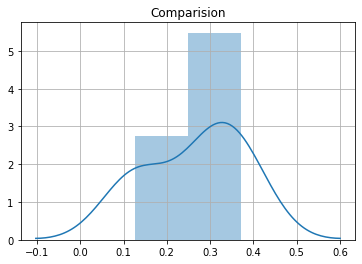

In [0]:
sns.distplot(list_result,kde=True)
#plt.hist(list_result)
plt.title('Comparision')
#plt.set_ylabel("rate of return")
#plt.set_xlabel("type")
plt.grid(True)
plt.show()

# Optimization:risk seeking

In [0]:
listpredict = []
listactual = []
listdiff = []
listdiff2 = []
listrandom = []

for i in range(100):
  listreturn=[]
  listrisk=[]
  listactualreturn=[]
  v = np.random.randint(0,30,10)
  #get random combination of 10 companies
  for num in v:
    listreturn.append(returnCoef[num])
    listrisk.append(riskCoef[num])
    listactualreturn.append(actualReturn[num])
  #print(listactualreturn)
  #LP
  n=10 #number of companies
  x = cvx.Variable(n, nonneg=True) #create a variable for weight, total n
  y = cvx.Variable(n, boolean=True)
  obj = cvx.Maximize(x*listreturn)
  cons = [] #initialize constraint list
  cons.append(cvx.sum(x) == 1) #weight sum to 1
  cons.append(x*listrisk <= 0.35) #risk constraints
  #cons.append(cvx.sum(y) >= 5)
  #cons.append(x >= y*0.05)
  cons.append(x <= y*0.8)
  prob = cvx.Problem(obj,cons)
  prob.solve()

  #get output
  predictWeight = x.value
  predictreturn = prob.value
  #np.sum(predictWeight*listreturn)
  actualreturn = np.sum(predictWeight*listactualreturn)
  listpredict.append(predictreturn)
  listactual.append(actualreturn)
  listdiff.append(predictreturn-actualreturn)
  

  #random weight generation
  a = np.random.random(10)
  a /= a.sum()
  randomreturn = np.sum(a*listactualreturn)
  #randomreturn = np.sum(a*listreturn)
  listrandom.append(randomreturn)
  listdiff2.append(actualreturn-randomreturn)
#print("the 100 predicted returns are: ", listpredict)
#print("the 100 (predict return-actual return) is: ",listdiff)

predictAvg = statistics.mean(listpredict)
predictstd = statistics.stdev(listpredict)
print("the average predict return is: ", statistics.mean(listpredict))
print("the predict return CI is: ", predictAvg-1.96*predictstd/10, predictAvg+1.96*predictstd/10)
actualAvg =  statistics.mean(listactual)
actualstd = statistics.stdev(listactual)
print("the average actual return is: ", statistics.mean(listactual))
print("the actual return CI is: ", actualAvg-1.96*actualstd/10, actualAvg+1.96*actualstd/10)
randomAvg = statistics.mean(listrandom)
randomstd = statistics.stdev(listrandom)
print("the average random return is: ", statistics.mean(listrandom))
print("the random return CI is: ", randomAvg-1.96*randomstd/10, randomAvg+1.96*randomstd/10)

# mean = statistics.mean(listdiff)
# print("the average (predict return-actual return) is: ", mean)
# print("the average (actual return-random return) is: ", statistics.mean(listdiff2))
# std = statistics.stdev(listdiff)
# print("the difference CI is: ", mean-1.96*std/10, mean+1.96*std/10)

the average predict return is:  0.3835800038103693
the predict return CI is:  0.3723217183223694 0.39483828929836917
the average actual return is:  0.15677483891118127
the actual return CI is:  0.10878070628776823 0.2047689715345943
the average random return is:  0.14461430569553613
the random return CI is:  0.12906956863817665 0.1601590427528956


In [0]:
n=31 #number of companies
x = cvx.Variable(n, nonneg=True) #create a variable for weight, total n
y = cvx.Variable(n, boolean=True)
obj = cvx.Maximize(x*returnCoef)
cons = [] #initialize constraint list
cons.append(cvx.sum(x) == 1) #weight sum to 1
cons.append(x*riskCoef <= 0.30) #risk constraints
cons.append(cvx.sum(y) >= 5)
cons.append(x >= y*0.05)
prob = cvx.Problem(obj,cons)
prob.solve()
print("The weight for investment on companies: ",x.value)
#print("y: ",y.value)
print("Final predicted return percentage: ",prob.value)
# listx=[]
# if (x>=0.2):
#   listx.append(x.value)
# print(listx)

The weight for investment on companies:  [0.         0.         0.         0.         0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.74977741 0.         0.
 0.05       0.         0.         0.05       0.         0.
 0.         0.         0.         0.         0.10022259 0.
 0.        ]
Final predicted return percentage:  0.4167339439933521


In [0]:
predictWeight = x.value
predictreturn = np.sum(predictWeight*df['return'])
print("predict: ",predictreturn)

actualreturn = np.sum(predictWeight*df['actual'])
print("actual: ", actualreturn)

a = np.random.random(31)
a /= a.sum()
randomreturn = np.sum(a*df['actual'])
print("random: ", randomreturn)

predict:  0.4167339439933522
actual:  -0.1277372064961582
random:  0.13978623186253444


# Balanced

In [0]:
listpredict = []
listactual = []
listdiff = []
listdiff2 = []
listrandom = []

for i in range(100):
  listreturn=[]
  listrisk=[]
  listactualreturn=[]
  v = np.random.randint(0,30,10)
  #get random combination of 10 companies
  for num in v:
    listreturn.append(returnCoef[num])
    listrisk.append(riskCoef[num])
    listactualreturn.append(actualReturn[num])
  #print(listactualreturn)
  
  #LP
  n=10 #number of companies
  x = cvx.Variable(n, nonneg=True) #create a variable for weight, total n
  y = cvx.Variable(n, boolean=True)
  obj = cvx.Maximize(x*listreturn)
  cons = [] #initialize constraint list
  cons.append(cvx.sum(x) == 1) #weight sum to 1
  cons.append(x*listrisk <= 0.3) #risk constraints
  #cons.append(cvx.sum(y) >= 5)
  #cons.append(x >= y*0.05)
  cons.append(x <= y*0.3)
  prob = cvx.Problem(obj,cons)
  prob.solve()

  #get output
  predictWeight = x.value
  predictreturn = prob.value
  #np.sum(predictWeight*listreturn)
  actualreturn = np.sum(predictWeight*listactualreturn)
  listpredict.append(predictreturn)
  listactual.append(actualreturn)
  listdiff.append(predictreturn-actualreturn)
  

  #random weight generation
  a = np.random.random(10)
  a /= a.sum()
  randomreturn = np.sum(a*listactualreturn)
  #randomreturn = np.sum(a*listreturn)
  listrandom.append(randomreturn)
  listdiff2.append(actualreturn-randomreturn)
#print("the 100 predicted returns are: ", listpredict)
#print("the 100 (predict return-actual return) is: ",listdiff)

predictAvg = statistics.mean(listpredict)
predictstd = statistics.stdev(listpredict)
print("the average predict return is: ", statistics.mean(listpredict))
print("the predict return CI is: ", predictAvg-1.96*predictstd/10, predictAvg+1.96*predictstd/10)
actualAvg =  statistics.mean(listactual)
actualstd = statistics.stdev(listactual)
print("the average actual return is: ", statistics.mean(listactual))
print("the actual return CI is: ", actualAvg-1.96*actualstd/10, actualAvg+1.96*actualstd/10)
randomAvg = statistics.mean(listrandom)
randomstd = statistics.stdev(listrandom)
print("the average random return is: ", statistics.mean(listrandom))
print("the random return CI is: ", randomAvg-1.96*randomstd/10, randomAvg+1.96*randomstd/10)

# mean = statistics.mean(listdiff)
# print("the average (predict return-actual return) is: ", mean)
# print("the average (actual return-random return) is: ", statistics.mean(listdiff2))
# std = statistics.stdev(listdiff)
# print("the difference CI is: ", mean-1.96*std/10, mean+1.96*std/10)

the average predict return is:  0.3156008691354626
the predict return CI is:  0.30528687600962867 0.3259148622612965
the average actual return is:  0.16352784870890794
the actual return CI is:  0.13212112551197414 0.19493457190584174
the average random return is:  0.13499286535938188
the random return CI is:  0.11872398937780904 0.15126174134095471


Scenario1: diverse

In [0]:
n=31 #number of companies
x = cvx.Variable(n, nonneg=True) #create a variable for weight, total n
#y = cvx.Variable(n, boolean=True)
obj = cvx.Maximize(x*returnCoef)
cons = [] #initialize constraint list
cons.append(cvx.sum(x) == 1) #weight sum to 1
#cons.append(x*riskCoef <= 0.30) #risk constraints
#cons.append(cvx.sum(y) >= 5)
cons.append(x <= 0.1)
prob = cvx.Problem(obj,cons)
prob.solve()
print("The weight for investment on companies: ",x.value)
#print("y: ",y.value)
print("Final predicted return percentage: ",prob.value)
# listx=[]
# if (x>=0.2):
#   listx.append(x.value)
# print(listx)

The weight for investment on companies:  [5.33627301e-08 5.33567535e-08 5.33782634e-08 5.33701830e-08
 5.33696861e-08 1.00000053e-01 5.33813656e-08 5.33824654e-08
 5.33582288e-08 5.33730124e-08 5.33738693e-08 5.33793884e-08
 5.33754288e-08 1.00000053e-01 5.33649482e-08 1.00000053e-01
 5.33765682e-08 5.33799641e-08 1.00000061e-01 5.33806785e-08
 1.00000053e-01 1.00000053e-01 5.33867940e-08 5.33693003e-08
 5.33645651e-08 1.00000053e-01 0.00000000e+00 5.33748158e-08
 1.00000053e-01 1.00000053e-01 1.00000053e-01]
Final predicted return percentage:  0.43021053427326694


In [0]:
predictWeight = x.value
predictreturn = np.sum(predictWeight*df['return'])
print("predict: ",predictreturn)

actualreturn = np.sum(predictWeight*df['actual'])
print("actual: ", actualreturn)

a = np.random.random(31)
a /= a.sum()
randomreturn = np.sum(a*df['actual'])
print("random: ", randomreturn)

predict:  0.43021095696011624
actual:  0.15637935389048563
random:  0.18737292234974398


Scenario2: one basket


In [0]:
n=31 #number of companies
x = cvx.Variable(n, nonneg=True) #create a variable for weight, total n
#y = cvx.Variable(n, boolean=True)
obj = cvx.Maximize(x*returnCoef)
cons = [] #initialize constraint list
cons.append(cvx.sum(x) == 1) #weight sum to 1
#cons.append(x*riskCoef <= 0.30) #risk constraints
#cons.append(cvx.sum(y) >= 5)
#cons.append(x <= 0.1)
prob = cvx.Problem(obj,cons)
prob.solve()
print("The weight for investment on companies: ",x.value)
#print("y: ",y.value)
print("Final predicted return percentage: ",prob.value)
# listx=[]
# if (x>=0.2):
#   listx.append(x.value)
# print(listx)

The weight for investment on companies:  [6.05268937e-28 6.05259693e-28 6.05124107e-28 6.05238122e-28
 6.05275100e-28 6.04994685e-28 6.05080966e-28 6.05084048e-28
 6.05262774e-28 6.05235041e-28 6.05139514e-28 6.05176492e-28
 6.05151840e-28 6.05031662e-28 6.05247367e-28 6.04920729e-28
 6.05158003e-28 6.05225796e-28 1.00000000e+00 6.05225796e-28
 5.55117560e-23 6.04933055e-28 6.05090211e-28 6.05241204e-28
 6.05247367e-28 6.05000848e-28 6.05053233e-28 6.05148759e-28
 6.04985440e-28 6.04957707e-28 6.04960788e-28]
Final predicted return percentage:  1.0144542480000005


In [0]:
predictWeight = x.value
predictreturn = np.sum(predictWeight*df['return'])
print("predict: ",predictreturn)

actualreturn = np.sum(predictWeight*df['actual'])
print("actual: ", actualreturn)

a = np.random.random(31)
a /= a.sum()
randomreturn = np.sum(a*df['actual'])
print("random: ", randomreturn)

predict:  1.0144542480000005
actual:  0.10909090900000004
random:  0.11899065979238838
